In [14]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt

In [15]:
nlp = spacy.load("en_core_web_sm")

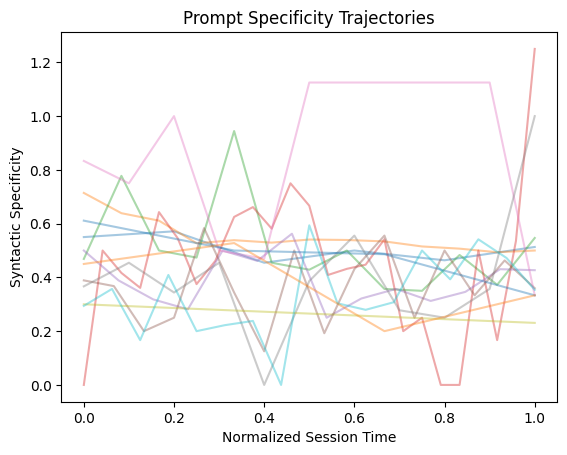

In [16]:
df = pd.read_csv("data/prompt_with_specificity.csv")

for cid, g in df.groupby("conversation_id"):
    plt.plot(g["t_norm"], g["syntactic_specificity"], alpha=0.4)

plt.xlabel("Normalized Session Time")
plt.ylabel("Syntactic Specificity")
plt.title("Prompt Specificity Trajectories")
plt.show()


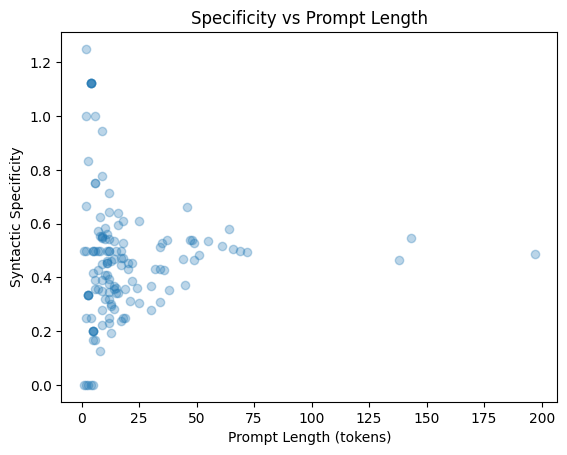

In [17]:
plt.scatter(df["prompt_length"], df["syntactic_specificity"], alpha=0.3)
plt.xlabel("Prompt Length (tokens)")
plt.ylabel("Syntactic Specificity")
plt.title("Specificity vs Prompt Length")
plt.show()


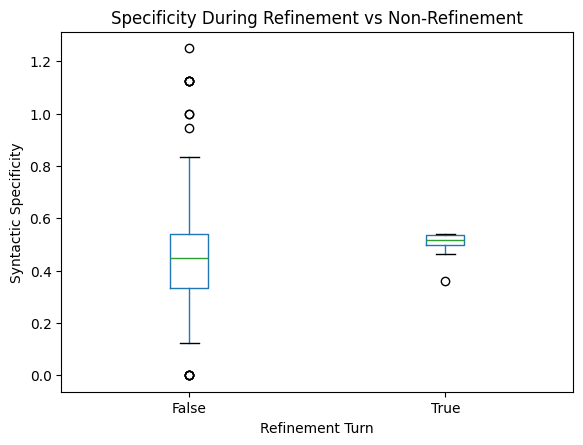

In [18]:
df.boxplot(
    column="syntactic_specificity",
    by="refinement",
    grid=False
)
plt.suptitle("")
plt.title("Specificity During Refinement vs Non-Refinement")
plt.xlabel("Refinement Turn")
plt.ylabel("Syntactic Specificity")
plt.show()


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DATA = Path("data/prompt_with_specificity.csv")
OUT_DIR = Path("plots/per_conversation")
OUT_DIR.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(DATA)

# weights (must match your metric)
W_ADJ = 1.5
W_NOUN = 1.0
W_NUM = 2.0
W_NEG = 1.0

for convo_id, g in df.groupby("conversation_id"):
    g = g.sort_values("timestep")

    x = g["timestep"]

    plt.figure(figsize=(8, 5))

    # raw
    plt.plot(
        x,
        g["syntactic_specificity"],
        marker="o",
        label="Raw specificity"
    )

    # components
    plt.plot(
        x,
        W_ADJ * g["adj_rate"],
        linestyle="--",
        label="1.5 × adj"
    )

    plt.plot(
        x,
        W_NOUN * g["noun_rate"],
        linestyle="--",
        label="1.0 × noun"
    )

    plt.plot(
        x,
        W_NUM * g["num_rate"],
        linestyle="--",
        label="2.0 × num"
    )

    plt.plot(
        x,
        W_NEG * g["neg_rate"],
        linestyle="--",
        label="1.0 × neg"
    )

    plt.title(convo_id)
    plt.xlabel("Prompt turn")
    plt.ylabel("Syntactic specificity")
    plt.legend()
    plt.tight_layout()

    plt.savefig(OUT_DIR / f"{convo_id}.png", dpi=150)
    plt.close()

print(f"✅ Saved {df['conversation_id'].nunique()} plots to {OUT_DIR}")


✅ Saved 12 plots to plots\per_conversation
